In [1]:
import scipy.integrate as integrate
import numpy as np

In [2]:
u0, v0, w0 = 0.5, 0, 0.1

In [3]:
def lorenz(t, X):
    sigma, beta, rho = 10, 8 / 3, 28  # parâmetros do modelo
    u, v, w = X
    u_prime = -sigma * (u - v)
    v_prime = rho * u - v - u * w
    w_prime = -beta * w + u * v
    return u_prime, v_prime, w_prime

In [4]:
t0 = 0  # tempo inicial
tmax = 100  # tempo máximo
t_points = 500  # número de pontos no tempo

In [5]:
solution_RADAU = integrate.solve_ivp(lorenz, t_span=(t0, tmax), y0=(u0, v0, w0,), method='Radau')
solution_RK = integrate.solve_ivp(lorenz, t_span=(t0, tmax), y0=(u0, v0, w0,), method='RK45')

t_computed_RADAU, y_computed_RADAU = solution_RADAU.t, solution_RADAU.y
t_computed_RK, y_computed_RK = solution_RK.t, solution_RK.y
# Separando as soluções
u_RADAU, v_RADAU, w_RADAU = y_computed_RADAU
u_RK, v_RK, w_RK = y_computed_RK

In [6]:
u_RADAU, u_RK

(array([ 0.5       ,  0.49949709,  0.49457303, ..., -9.21819058,
        -7.90695061, -7.05009024]),
 array([ 0.5       ,  0.49949709,  0.49457303, ..., 15.13391297,
        14.22390457, 10.08089516]))

In [7]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12, 12))
ax = fig.gca(projection='3d')
ax.plot(u_RADAU, v_RADAU, w_RADAU)
# ax.set_axis_off()
plt.show()

<Figure size 1200x1200 with 1 Axes>

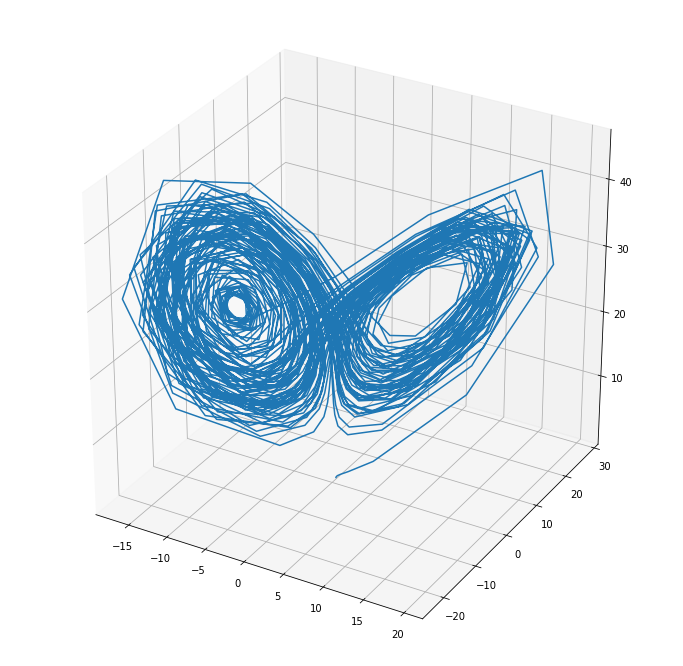

In [8]:
fig = plt.figure(figsize=(12, 12))
ax = fig.gca(projection='3d')
ax.plot(u_RK, v_RK, w_RK)
# ax.set_axis_off()
plt.show()

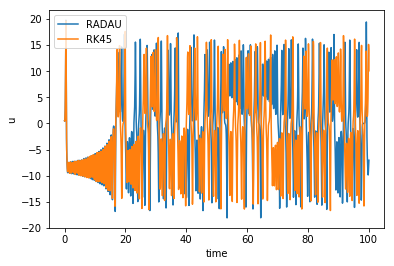

In [9]:
plt.plot(t_computed_RADAU, u_RADAU, label='RADAU')
plt.plot(t_computed_RK, u_RK, label='RK45')
plt.xlabel('time')
plt.ylabel('u')
plt.legend()
plt.show()